Risultati del fit preliminare:
A = 0.9829 ± 0.0407
B = -0.0000 ± 0.0000
C = -0.3027 ± 0.1995
D = 0.0000 ± 0.0000
fr = 5478487447.8714 ± 2810485.1228
QL = 923.6921 ± 850.2526


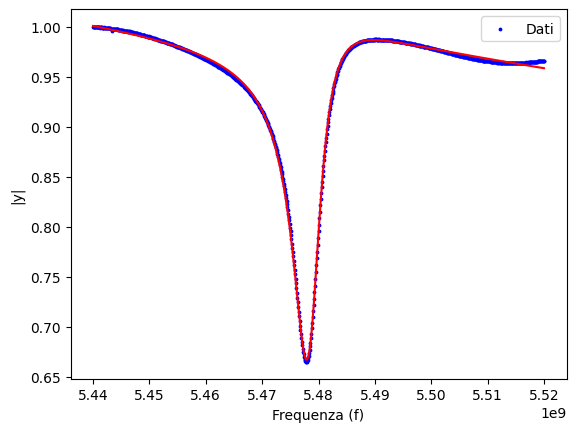

Risultati del fit:
L = -147.6268 ± 0.0281
C = 42.7207 ± 0.0626
fr = 5478531061.6816 ± 58624.7623
phi = -828.4755 ± 0.0041
a0 = -0.0000 ± 0.0000
a1 = -0.0000 ± 0.0000
a2 = 0.0000 ± 0.0000


KeyError: 'a3'

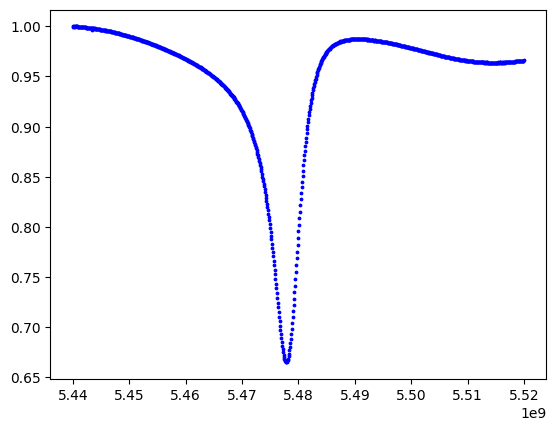

In [3]:
import sys 
sys.path.append("../analysis")
import circular_resonator 
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    '''
    funzione per leggere i dati
    '''
    data = np.loadtxt(file_path)  
    f = data[:, 0]     # frequenza
    y = data[:, 1]     # parte reale (I)
    return f, y

def main () :
    file_path = "../data/Resonances/20mK_-10dBm.txt"

    f, power = read_data (file_path)
    #power = np.sqrt(np.abs(x)**2 + np.abs(y)**2
    # scala lineare
    power = 10**(power/20)
    
    # normalizzazione
    ymax = np.max(power)
    power = power/ymax


    parameters, errors = circular_resonator.fit_resonance (f, power)

    # Stampa dei risultati
    print("Risultati del fit:")
    parametri = ["L", "C", "fr", "phi", "a0", "a1", "a2", "a3"]
    for parametro in parametri:
        print(f"{parametro} = {parameters[parametro]:.4f} ± {errors[parametro]:.4f}")


    # Plot dei dati e del fit
    plt.scatter(f, power, label='Dati', color='blue', s = 3)

    plt.plot(f, circular_resonator.full_fit(f, a0=parameters["a0"], a1=parameters["a1"], a2 = parameters["a2"], a3 = parameters["a3"], L=parameters["L"], C=parameters["C"], fr=parameters["fr"], phi=parameters["phi"], fmin=parameters["fmin"] ), color = "red")

    plt.xlabel('Frequenza (f)')
    plt.ylabel('|y|')
    plt.legend()
    plt.show()

    

if __name__ == '__main__' :
    main ()



